In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [87]:
data1=pd.read_csv('SALES_DATA.csv')

In [88]:
data1.info()
data1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566309 entries, 0 to 566308
Data columns (total 27 columns):
InvoiceNo           566309 non-null object
StockCode           566309 non-null object
Quantity Shipped    566309 non-null float64
Year                566309 non-null int64
Invoice Date        566309 non-null object
UnitPrice           566309 non-null float64
Ext-Price           566309 non-null float64
CustomerID          566309 non-null int64
Country             566309 non-null object
GM%                 566309 non-null float64
Shipper             566309 non-null object
COST                566309 non-null float64
EXT COST            566309 non-null float64
REGION              566309 non-null object
SALES P             566309 non-null object
Product             566309 non-null object
Month               566309 non-null object
Season              566309 non-null object
Year Idx            566309 non-null int64
Month 2             566309 non-null object
Month #             566309

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,...,Season,Year Idx,Month 2,Month #,Period,UK Indicator,Central,North,South,West
0,568200,PADS,5.00,2017,9/25/2017,0.999975,4.999876,16198,United Kingdom,0.000023,...,3,1,10,10,3,1,0,0,1,0
1,568375,BANK CHARGES,5.00,2017,9/26/2017,0.999976,4.999883,13405,United Kingdom,1.000000,...,3,1,10,10,3,1,0,0,0,1
2,561226,PADS,5.00,2017,7/26/2017,0.999886,4.999428,15618,United Kingdom,-0.000067,...,3,1,8,8,3,1,0,0,1,0
3,2550193,PADS,7.08,2018,6/8/2018,0.999962,7.079728,13952,United Kingdom,0.000009,...,2,2,19,19,6,1,1,0,0,0
4,550193,PADS,5.00,2017,4/15/2017,0.999988,4.999940,13952,United Kingdom,0.000035,...,2,1,5,5,2,1,1,0,0,0


In [89]:
data1=data1[data1['Invoice Date']!='2/29/2018']

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566076 entries, 0 to 566308
Data columns (total 27 columns):
InvoiceNo           566076 non-null object
StockCode           566076 non-null object
Quantity Shipped    566076 non-null float64
Year                566076 non-null int64
Invoice Date        566076 non-null object
UnitPrice           566076 non-null float64
Ext-Price           566076 non-null float64
CustomerID          566076 non-null int64
Country             566076 non-null object
GM%                 566076 non-null float64
Shipper             566076 non-null object
COST                566076 non-null float64
EXT COST            566076 non-null float64
REGION              566076 non-null object
SALES P             566076 non-null object
Product             566076 non-null object
Month               566076 non-null object
Season              566076 non-null object
Year Idx            566076 non-null int64
Month 2             566076 non-null object
Month #             566076

In [48]:
# look at seasonal pattern
season_freq=data1[['Month #','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('Month #')

season_freq.info()
season_freq.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139955 entries, 431960 to 12504
Data columns (total 3 columns):
Month #         139955 non-null object
Invoice Date    139955 non-null object
InvoiceNo       139955 non-null object
dtypes: object(3)
memory usage: 4.3+ MB


,Month #,Invoice Date,InvoiceNo
431960,01,12/21/2016,539748
76553,01,12/5/2016,537141
135747,01,12/13/2016,538668
76526,01,12/7/2016,537617
29482,01,12/14/2016,538830


In [49]:
group_freq=season_freq.groupby(['Month #','Invoice Date'])['InvoiceNo'].aggregate('count').reset_index()

group_freq.info()
group_freq.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 3 columns):
Month #         656 non-null object
Invoice Date    656 non-null object
InvoiceNo       656 non-null int64
dtypes: int64(1), object(2)
memory usage: 15.5+ KB


,Month #,Invoice Date,InvoiceNo
0,01,12/1/2016,35
1,01,12/10/2016,81
2,01,12/12/2016,18
3,01,12/13/2016,50
4,01,12/14/2016,125


In [50]:
month_freq=group_freq.groupby(['Month #'])['InvoiceNo'].aggregate('sum').reset_index()

month_freq.info()
month_freq.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Month #      25 non-null object
InvoiceNo    25 non-null int64
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


,Month #,InvoiceNo
0,01,1434
1,02,984
2,03,1008
3,04,1227
4,05,1151


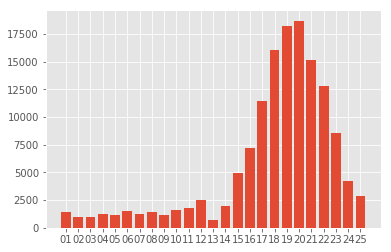

In [51]:
month=list(month_freq['Month #'])
freq=list(month_freq['InvoiceNo'])

plt.bar(month,freq)
plt.xticks(month)

plt.show()

In [53]:
season_sale=data1[['Month #','Ext-Price','Quantity Shipped']].sort_values('Month #')

season_sale.info()
season_sale.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 566076 entries, 496499 to 167638
Data columns (total 3 columns):
Month #             566076 non-null object
Ext-Price           566076 non-null float64
Quantity Shipped    566076 non-null float64
dtypes: float64(2), object(1)
memory usage: 17.3+ MB


,Month #,Ext-Price,Quantity Shipped
496499,01,2469.309770,931.7025
199657,01,12.275037,13.5000
199655,01,2.385658,2.9025
403085,01,15.163412,10.7500
199641,01,842.697338,580.5000


In [54]:
month_sale=season_sale.groupby(['Month #'])['Ext-Price','Quantity Shipped'].aggregate('sum').reset_index()

month_sale.info()
month_sale.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
Month #             25 non-null object
Ext-Price           25 non-null float64
Quantity Shipped    25 non-null float64
dtypes: float64(2), object(1)
memory usage: 680.0+ bytes


,Month #,Ext-Price,Quantity Shipped
0,01,8.853965e+06,4.771010e+06
1,02,1.368513e+06,8.256736e+05
2,03,9.143919e+05,6.979244e+05
3,04,1.249533e+06,9.821636e+05
4,05,9.481132e+05,7.599059e+05


In [56]:
month_sale['freq']=month_freq['InvoiceNo']

month_sale['Sales per Order']=month_sale['Ext-Price']/month_sale['freq']
month_sale['Quant per Order']=month_sale['Quantity Shipped']/month_sale['freq']

month_sale.head()

,Month #,Ext-Price,Quantity Shipped,freq,Sales per Order,Quant per Order
0,01,8.853965e+06,4.771010e+06,1434,6174.312934,3327.064287
1,02,1.368513e+06,8.256736e+05,984,1390.764877,839.099149
2,03,9.143919e+05,6.979244e+05,1008,907.134831,692.385271
3,04,1.249533e+06,9.821636e+05,1227,1018.364405,800.459348
4,05,9.481132e+05,7.599059e+05,1151,823.730017,660.213648


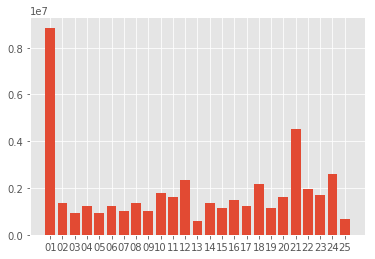

In [59]:
index = list(month_sale['Month #'])

plt.bar(index,month_sale['Ext-Price'])
plt.xticks(index)

plt.show()

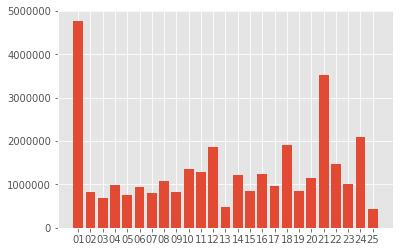

In [60]:
plt.bar(index,month_sale['Quantity Shipped'])
plt.xticks(index)

plt.show()

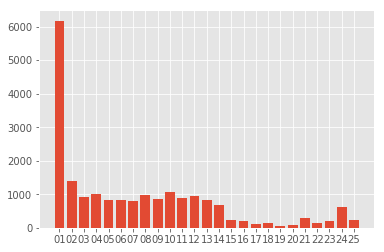

In [61]:
plt.bar(index,month_sale['Sales per Order'])
plt.xticks(index)

plt.show()

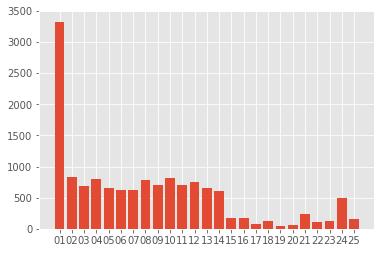

In [62]:
plt.bar(index,month_sale['Quant per Order'])
plt.xticks(index)

plt.show()

In [90]:
# prepare
data1['Invoice Date'] = pd.to_datetime(data1['Invoice Date'])

data1.head()

,InvoiceNo,StockCode,Quantity Shipped,Year,Invoice Date,UnitPrice,Ext-Price,CustomerID,Country,GM%,...,Season,Year Idx,Month 2,Month #,Period,UK Indicator,Central,North,South,West
0,568200,PADS,5.00,2017,2017-09-25,0.999975,4.999876,16198,United Kingdom,0.000023,...,3,1,10,10,3,1,0,0,1,0
1,568375,BANK CHARGES,5.00,2017,2017-09-26,0.999976,4.999883,13405,United Kingdom,1.000000,...,3,1,10,10,3,1,0,0,0,1
2,561226,PADS,5.00,2017,2017-07-26,0.999886,4.999428,15618,United Kingdom,-0.000067,...,3,1,8,8,3,1,0,0,1,0
3,2550193,PADS,7.08,2018,2018-06-08,0.999962,7.079728,13952,United Kingdom,0.000009,...,2,2,19,19,6,1,1,0,0,0
4,550193,PADS,5.00,2017,2017-04-15,0.999988,4.999940,13952,United Kingdom,0.000035,...,2,1,5,5,2,1,1,0,0,0


In [91]:
data1=data1[data1['Year']!=2016]

data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537353 entries, 0 to 566308
Data columns (total 27 columns):
InvoiceNo           537353 non-null object
StockCode           537353 non-null object
Quantity Shipped    537353 non-null float64
Year                537353 non-null int64
Invoice Date        537353 non-null datetime64[ns]
UnitPrice           537353 non-null float64
Ext-Price           537353 non-null float64
CustomerID          537353 non-null int64
Country             537353 non-null object
GM%                 537353 non-null float64
Shipper             537353 non-null object
COST                537353 non-null float64
EXT COST            537353 non-null float64
REGION              537353 non-null object
SALES P             537353 non-null object
Product             537353 non-null object
Month               537353 non-null object
Season              537353 non-null object
Year Idx            537353 non-null int64
Month 2             537353 non-null object
Month #           

Get target sets for 5 sliders, p4 to p8 respectively

In [92]:
# get target data
t1=data1[data1['Period']=='4']
t1=t1[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST']]

t1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127167 entries, 10 to 566308
Data columns (total 5 columns):
CustomerID      127167 non-null int64
InvoiceNo       127167 non-null object
Invoice Date    127167 non-null datetime64[ns]
Ext-Price       127167 non-null float64
EXT COST        127167 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 5.8+ MB


In [93]:
periodgroup = data1.groupby('Period')

t2 = periodgroup.get_group('5')[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST']]
t3 = periodgroup.get_group('6')[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST']]
t4 = periodgroup.get_group('7')[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST']]
t5 = periodgroup.get_group('8')[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST']]

print(t2.info(),t3.info(),t4.info(),t5.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17898 entries, 230 to 566286
Data columns (total 5 columns):
CustomerID      17898 non-null int64
InvoiceNo       17898 non-null object
Invoice Date    17898 non-null datetime64[ns]
Ext-Price       17898 non-null float64
EXT COST        17898 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 839.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54540 entries, 3 to 566302
Data columns (total 5 columns):
CustomerID      54540 non-null int64
InvoiceNo       54540 non-null object
Invoice Date    54540 non-null datetime64[ns]
Ext-Price       54540 non-null float64
EXT COST        54540 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53998 entries, 7 to 566306
Data columns (total 5 columns):
CustomerID      53998 non-null int64
InvoiceNo       53998 non-null object
Invoice Date    53998 non-null dat

In [94]:
# get target frequency
f1=t1[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')
f2=t2[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')
f3=t3[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')
f4=t4[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')
f5=t5[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')

In [95]:
f1=f1.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()
f2=f2.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()
f3=f3.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()
f4=f4.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()
f5=f5.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()

f1.rename(columns={'InvoiceNo': 'T_Frequency'}, inplace=True)
f2.rename(columns={'InvoiceNo': 'T_Frequency'}, inplace=True)
f3.rename(columns={'InvoiceNo': 'T_Frequency'}, inplace=True)
f4.rename(columns={'InvoiceNo': 'T_Frequency'}, inplace=True)
f5.rename(columns={'InvoiceNo': 'T_Frequency'}, inplace=True)

In [96]:
f3.head()

,CustomerID,T_Frequency
0,12346,1
1,12347,31
2,12348,4
3,12350,7
4,12352,9


In [97]:
print(f1.info(),f2.info(),f3.info(),f4.info(),f5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 2 columns):
CustomerID     2335 non-null int64
T_Frequency    2335 non-null int64
dtypes: int64(2)
memory usage: 36.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 2 columns):
CustomerID     1253 non-null int64
T_Frequency    1253 non-null int64
dtypes: int64(2)
memory usage: 19.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 2 columns):
CustomerID     2253 non-null int64
T_Frequency    2253 non-null int64
dtypes: int64(2)
memory usage: 35.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2273 entries, 0 to 2272
Data columns (total 2 columns):
CustomerID     2273 non-null int64
T_Frequency    2273 non-null int64
dtypes: int64(2)
memory usage: 35.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 2 columns):
CustomerID     1798 non-null int64

In [98]:
# get other metrics
ts=[t1,t2,t3,t4,t5]

for t in ts:
    t['Date1']=t['Invoice Date']
    t['Date2']=t['Invoice Date']
    t['Profit']=t['Ext-Price'] - t['EXT COST']

In [99]:
t3.head()

,CustomerID,InvoiceNo,Invoice Date,Ext-Price,EXT COST,Date1,Date2,Profit
3,13952,2550193,2018-06-08,7.079728,7.079664,2018-06-08,2018-06-08,0.000064
111,14298,2551291,2018-05-02,9.772432,10.185700,2018-05-02,2018-05-02,-0.413268
117,14669,2549771,2018-06-03,3.028508,3.136477,2018-06-03,2018-06-03,-0.107969
127,17470,2552059,2018-05-14,3.977533,3.964897,2018-05-14,2018-05-14,0.012636
130,14688,2556188,2018-06-23,41.154884,42.939700,2018-06-23,2018-06-23,-1.784815


In [100]:
import datetime as dt

t_end1 = dt.datetime(2017,12,31)
t_end2 = dt.datetime(2018, 3,31)
t_end3 = dt.datetime(2018, 6,30)
t_end4 = dt.datetime(2018, 9,30)
t_end5 = dt.datetime(2018,12,31)

In [101]:
tx1=t1.groupby('CustomerID').agg({'Invoice Date': lambda x: (t_end1 - x.max()).days, 'Date1':lambda x: x.min(), 
                                  'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                  'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum()})
tx2=t2.groupby('CustomerID').agg({'Invoice Date': lambda x: (t_end2 - x.max()).days, 'Date1':lambda x: x.min(), 
                                  'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                  'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum()})
tx3=t3.groupby('CustomerID').agg({'Invoice Date': lambda x: (t_end3 - x.max()).days, 'Date1':lambda x: x.min(), 
                                  'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                  'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum()})
tx4=t4.groupby('CustomerID').agg({'Invoice Date': lambda x: (t_end4 - x.max()).days, 'Date1':lambda x: x.min(), 
                                  'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                  'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum()})
tx5=t5.groupby('CustomerID').agg({'Invoice Date': lambda x: (t_end5 - x.max()).days, 'Date1':lambda x: x.min(), 
                                  'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                  'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum()})

tx1['Invoice Date']=tx1['Invoice Date'].astype(int)
tx2['Invoice Date']=tx2['Invoice Date'].astype(int)
tx3['Invoice Date']=tx3['Invoice Date'].astype(int)
tx4['Invoice Date']=tx4['Invoice Date'].astype(int)
tx5['Invoice Date']=tx5['Invoice Date'].astype(int)

tx1.rename(columns={'Invoice Date': 'T_Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'T_Revenue', 'EXT COST': 'T_Cost', 'Profit': 'T_Profit'}, inplace=True)
tx2.rename(columns={'Invoice Date': 'T_Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'T_Revenue', 'EXT COST': 'T_Cost', 'Profit': 'T_Profit'}, inplace=True)
tx3.rename(columns={'Invoice Date': 'T_Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'T_Revenue', 'EXT COST': 'T_Cost', 'Profit': 'T_Profit'}, inplace=True)
tx4.rename(columns={'Invoice Date': 'T_Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'T_Revenue', 'EXT COST': 'T_Cost', 'Profit': 'T_Profit'}, inplace=True)
tx5.rename(columns={'Invoice Date': 'T_Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'T_Revenue', 'EXT COST': 'T_Cost', 'Profit': 'T_Profit'}, inplace=True)

tx3.info()
tx3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 12346 to 18283
Data columns (total 6 columns):
T_Recency    2253 non-null int32
First Day    2253 non-null datetime64[ns]
Last Day     2253 non-null datetime64[ns]
T_Revenue    2253 non-null float64
T_Cost       2253 non-null float64
T_Profit     2253 non-null float64
dtypes: datetime64[ns](2), float64(3), int32(1)
memory usage: 114.4 KB


,T_Recency,First Day,Last Day,T_Revenue,T_Cost,T_Profit
CustomerID,,,,,,
12346,52,2018-05-09,2018-05-09,750849.719800,855425.223500,-104575.503700
12347,0,2018-04-06,2018-06-30,983.752898,899.933032,83.819865
12348,23,2018-04-02,2018-06-07,113.969638,117.877257,-3.907619
12350,10,2018-04-07,2018-06-20,90.572985,99.904428,-9.331442
12352,16,2018-04-01,2018-06-14,501.996992,523.595724,-21.598731


In [102]:
txs = [tx1,tx2,tx3,tx4,tx5]

for tx in txs:
    tx['T_Duration'] = tx['Last Day'] - tx['First Day']
    tx['T_GM%'] = tx['T_Profit'] / tx['T_Revenue']
    
tx3.head()

,T_Recency,First Day,Last Day,T_Revenue,T_Cost,T_Profit,T_Duration,T_GM%
CustomerID,,,,,,,,
12346,52,2018-05-09,2018-05-09,750849.719800,855425.223500,-104575.503700,0 days,-0.139276
12347,0,2018-04-06,2018-06-30,983.752898,899.933032,83.819865,85 days,0.085204
12348,23,2018-04-02,2018-06-07,113.969638,117.877257,-3.907619,66 days,-0.034286
12350,10,2018-04-07,2018-06-20,90.572985,99.904428,-9.331442,74 days,-0.103027
12352,16,2018-04-01,2018-06-14,501.996992,523.595724,-21.598731,74 days,-0.043026


In [103]:
# combine frequency
y1=pd.merge(f1, tx1, how='inner', on = 'CustomerID')
y2=pd.merge(f2, tx2, how='inner', on = 'CustomerID')
y3=pd.merge(f3, tx3, how='inner', on = 'CustomerID')
y4=pd.merge(f4, tx4, how='inner', on = 'CustomerID')
y5=pd.merge(f5, tx5, how='inner', on = 'CustomerID')

print(f3.info(),tx3.info(),y3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 2 columns):
CustomerID     2253 non-null int64
T_Frequency    2253 non-null int64
dtypes: int64(2)
memory usage: 35.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 12346 to 18283
Data columns (total 8 columns):
T_Recency     2253 non-null int32
First Day     2253 non-null datetime64[ns]
Last Day      2253 non-null datetime64[ns]
T_Revenue     2253 non-null float64
T_Cost        2253 non-null float64
T_Profit      2253 non-null float64
T_Duration    2253 non-null timedelta64[ns]
T_GM%         2253 non-null float64
dtypes: datetime64[ns](2), float64(4), int32(1), timedelta64[ns](1)
memory usage: 149.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2253 entries, 0 to 2252
Data columns (total 10 columns):
CustomerID     2253 non-null int64
T_Frequency    2253 non-null int64
T_Recency      2253 non-null int32
First Day      2253 non-null datetime64[ns]
Last Day       2253

Get feature sets, p1-p3, p2-p4, ... , p5-p7, p6-p8 (6 sliders)

In [111]:
# note that the index starts from 0
d1 = pd.concat([periodgroup.get_group(group) for i,group in enumerate(periodgroup.groups) if i>=0 and i<=2])[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST','Quantity Shipped']]
d2 = pd.concat([periodgroup.get_group(group) for i,group in enumerate(periodgroup.groups) if i>=1 and i<=3])[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST','Quantity Shipped']]
d3 = pd.concat([periodgroup.get_group(group) for i,group in enumerate(periodgroup.groups) if i>=2 and i<=4])[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST','Quantity Shipped']]
d4 = pd.concat([periodgroup.get_group(group) for i,group in enumerate(periodgroup.groups) if i>=3 and i<=5])[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST','Quantity Shipped']]
d5 = pd.concat([periodgroup.get_group(group) for i,group in enumerate(periodgroup.groups) if i>=4 and i<=6])[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST','Quantity Shipped']]
d6 = pd.concat([periodgroup.get_group(group) for i,group in enumerate(periodgroup.groups) if i>=5 and i<=7])[['CustomerID','InvoiceNo','Invoice Date','Ext-Price','EXT COST','Quantity Shipped']]

d3.info()
d3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241963 entries, 0 to 566286
Data columns (total 6 columns):
CustomerID          241963 non-null int64
InvoiceNo           241963 non-null object
Invoice Date        241963 non-null datetime64[ns]
Ext-Price           241963 non-null float64
EXT COST            241963 non-null float64
Quantity Shipped    241963 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 12.9+ MB


,CustomerID,InvoiceNo,Invoice Date,Ext-Price,EXT COST,Quantity Shipped
0,16198,568200,2017-09-25,4.999876,4.999763,5.000
1,13405,568375,2017-09-26,4.999883,0.000000,5.000
2,15618,561226,2017-07-26,4.999428,4.999763,5.000
5,16948,561047,2017-07-24,1.079102,1.080605,1.075
6,13654,560259,2017-07-17,6.496234,6.483628,6.450


In [112]:
# get feature frequency
ff1=d1[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')
ff2=d2[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')
ff3=d3[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')
ff4=d4[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')
ff5=d5[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')
ff6=d6[['CustomerID','Invoice Date','InvoiceNo']].drop_duplicates().sort_values('CustomerID')

In [113]:
ff1 = ff1.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()
ff2 = ff2.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()
ff3 = ff3.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()
ff4 = ff4.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()
ff5 = ff5.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()
ff6 = ff6.groupby(['CustomerID'])['InvoiceNo'].aggregate('count').reset_index()

ff1.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
ff2.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
ff3.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
ff4.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
ff5.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)
ff6.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

ff3.head()

,CustomerID,Frequency
0,12347,11
1,12348,2
2,12349,1
3,12350,3
4,12352,2


In [114]:
# get other metrics
d_list = [d1,d2,d3,d4,d5,d6]

for d in d_list:
    d['Date1']=d['Invoice Date']
    d['Date2']=d['Invoice Date']
    d['Profit']=d['Ext-Price'] - d['EXT COST']

d3.head()

,CustomerID,InvoiceNo,Invoice Date,Ext-Price,EXT COST,Quantity Shipped,Date1,Date2,Profit
0,16198,568200,2017-09-25,4.999876,4.999763,5.000,2017-09-25,2017-09-25,0.000113
1,13405,568375,2017-09-26,4.999883,0.000000,5.000,2017-09-26,2017-09-26,4.999883
2,15618,561226,2017-07-26,4.999428,4.999763,5.000,2017-07-26,2017-07-26,-0.000335
5,16948,561047,2017-07-24,1.079102,1.080605,1.075,2017-07-24,2017-07-24,-0.001502
6,13654,560259,2017-07-17,6.496234,6.483628,6.450,2017-07-17,2017-07-17,0.012606


In [115]:
# end date for 6 sliders' feature periods
end1 = dt.datetime(2017, 9,30)
end2 = dt.datetime(2017,12,31)
end3 = dt.datetime(2018, 3,31)
end4 = dt.datetime(2018, 6,30)
end5 = dt.datetime(2018, 9,30)
end6 = dt.datetime(2018,12,31)

In [116]:
dx1 = d1.groupby('CustomerID').agg({'Invoice Date': lambda x: (end1 - x.max()).days, 'Date1':lambda x: x.min(), 
                                    'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                    'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum(), 'Quantity Shipped': lambda x: x.sum()})
dx2 = d2.groupby('CustomerID').agg({'Invoice Date': lambda x: (end2 - x.max()).days, 'Date1':lambda x: x.min(), 
                                    'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                    'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum(), 'Quantity Shipped': lambda x: x.sum()})
dx3 = d3.groupby('CustomerID').agg({'Invoice Date': lambda x: (end3 - x.max()).days, 'Date1':lambda x: x.min(), 
                                    'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                    'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum(), 'Quantity Shipped': lambda x: x.sum()})
dx4 = d4.groupby('CustomerID').agg({'Invoice Date': lambda x: (end4 - x.max()).days, 'Date1':lambda x: x.min(), 
                                    'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                    'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum(), 'Quantity Shipped': lambda x: x.sum()})
dx5 = d5.groupby('CustomerID').agg({'Invoice Date': lambda x: (end5 - x.max()).days, 'Date1':lambda x: x.min(), 
                                    'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                    'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum(), 'Quantity Shipped': lambda x: x.sum()})
dx6 = d6.groupby('CustomerID').agg({'Invoice Date': lambda x: (end6 - x.max()).days, 'Date1':lambda x: x.min(), 
                                    'Date2':lambda x: x.max(), 'Ext-Price': lambda x: x.sum(), 
                                    'EXT COST': lambda x: x.sum(), 'Profit': lambda x: x.sum(), 'Quantity Shipped': lambda x: x.sum()})

dx1['Invoice Date']=dx1['Invoice Date'].astype(int)
dx2['Invoice Date']=dx2['Invoice Date'].astype(int)
dx3['Invoice Date']=dx3['Invoice Date'].astype(int)
dx4['Invoice Date']=dx4['Invoice Date'].astype(int)
dx5['Invoice Date']=dx5['Invoice Date'].astype(int)
dx6['Invoice Date']=dx6['Invoice Date'].astype(int)

dx1.rename(columns={'Invoice Date': 'Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'Revenue', 'EXT COST': 'Cost', 'Quantity Shipped': 'Unit Sales',}, inplace=True)
dx2.rename(columns={'Invoice Date': 'Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'Revenue', 'EXT COST': 'Cost', 'Quantity Shipped': 'Unit Sales',}, inplace=True)
dx3.rename(columns={'Invoice Date': 'Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'Revenue', 'EXT COST': 'Cost', 'Quantity Shipped': 'Unit Sales',}, inplace=True)
dx4.rename(columns={'Invoice Date': 'Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'Revenue', 'EXT COST': 'Cost', 'Quantity Shipped': 'Unit Sales',}, inplace=True)
dx5.rename(columns={'Invoice Date': 'Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'Revenue', 'EXT COST': 'Cost', 'Quantity Shipped': 'Unit Sales',}, inplace=True)
dx6.rename(columns={'Invoice Date': 'Recency', 'Date1': 'First Day', 'Date2': 'Last Day',
                    'Ext-Price': 'Revenue', 'EXT COST': 'Cost', 'Quantity Shipped': 'Unit Sales',}, inplace=True)

dx3.info()
dx3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3436 entries, 12347 to 18287
Data columns (total 7 columns):
Recency       3436 non-null int32
First Day     3436 non-null datetime64[ns]
Last Day      3436 non-null datetime64[ns]
Revenue       3436 non-null float64
Cost          3436 non-null float64
Profit        3436 non-null float64
Unit Sales    3436 non-null float64
dtypes: datetime64[ns](2), float64(4), int32(1)
memory usage: 201.3 KB


,Recency,First Day,Last Day,Revenue,Cost,Profit,Unit Sales
CustomerID,,,,,,,
12347,6,2017-08-02,2018-03-25,1611.934510,1390.294031,221.640479,1482.10375
12348,21,2017-09-25,2018-03-10,658.184924,676.647876,-18.462952,548.60000
12349,130,2017-11-21,2017-11-21,982.177517,845.699192,136.478325,782.51000
12350,1,2018-03-05,2018-03-30,269.148154,316.204151,-47.055997,252.00000
12352,148,2017-09-28,2017-11-03,430.250266,391.089778,39.160489,307.85250


In [117]:
dx_list = [dx1,dx2,dx3,dx4,dx5,dx6]

for dx in dx_list:
    dx['Duration'] = dx['Last Day'] - dx['First Day']
    dx['GM%'] = dx['Profit'] / dx['Revenue']
    
dx3.head()

,Recency,First Day,Last Day,Revenue,Cost,Profit,Unit Sales,Duration,GM%
CustomerID,,,,,,,,,
12347,6,2017-08-02,2018-03-25,1611.934510,1390.294031,221.640479,1482.10375,235 days,0.137500
12348,21,2017-09-25,2018-03-10,658.184924,676.647876,-18.462952,548.60000,166 days,-0.028051
12349,130,2017-11-21,2017-11-21,982.177517,845.699192,136.478325,782.51000,0 days,0.138955
12350,1,2018-03-05,2018-03-30,269.148154,316.204151,-47.055997,252.00000,25 days,-0.174833
12352,148,2017-09-28,2017-11-03,430.250266,391.089778,39.160489,307.85250,36 days,0.091018


In [120]:
# combine frequency
x1 = pd.merge(ff1, dx1, how='inner', on = 'CustomerID')
x2 = pd.merge(ff2, dx2, how='inner', on = 'CustomerID')
x3 = pd.merge(ff3, dx3, how='inner', on = 'CustomerID')
x4 = pd.merge(ff4, dx4, how='inner', on = 'CustomerID')
x5 = pd.merge(ff5, dx5, how='inner', on = 'CustomerID')
x6 = pd.merge(ff6, dx6, how='inner', on = 'CustomerID')

print(ff3.info(),dx3.info(),x3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3436 entries, 0 to 3435
Data columns (total 2 columns):
CustomerID    3436 non-null int64
Frequency     3436 non-null int64
dtypes: int64(2)
memory usage: 53.8 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3436 entries, 12347 to 18287
Data columns (total 9 columns):
Recency       3436 non-null int32
First Day     3436 non-null datetime64[ns]
Last Day      3436 non-null datetime64[ns]
Revenue       3436 non-null float64
Cost          3436 non-null float64
Profit        3436 non-null float64
Unit Sales    3436 non-null float64
Duration      3436 non-null timedelta64[ns]
GM%           3436 non-null float64
dtypes: datetime64[ns](2), float64(5), int32(1), timedelta64[ns](1)
memory usage: 255.0 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3436 entries, 0 to 3435
Data columns (total 11 columns):
CustomerID    3436 non-null int64
Frequency     3436 non-null int64
Recency       3436 non-null int32
First Day     3436 non-null date

In [121]:
# get region data
region = data1[['CustomerID','Central','North','South','West']].drop_duplicates().sort_values('CustomerID')

region.info()
region.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4120 entries, 109624 to 5780
Data columns (total 5 columns):
CustomerID    4120 non-null int64
Central       4120 non-null int64
North         4120 non-null int64
South         4120 non-null int64
West          4120 non-null int64
dtypes: int64(5)
memory usage: 193.1 KB


,CustomerID,Central,North,South,West
109624,12346,0,0,0,1
9452,12347,0,1,0,0
1429,12348,0,1,0,0
35907,12349,0,0,0,1
34969,12350,1,0,0,0


In [122]:
xr1 = pd.merge(x1, region, how='inner', on = 'CustomerID')
xr2 = pd.merge(x2, region, how='inner', on = 'CustomerID')
xr3 = pd.merge(x3, region, how='inner', on = 'CustomerID')
xr4 = pd.merge(x4, region, how='inner', on = 'CustomerID')
xr5 = pd.merge(x5, region, how='inner', on = 'CustomerID')
xr6 = pd.merge(x6, region, how='inner', on = 'CustomerID')

xr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3436 entries, 0 to 3435
Data columns (total 15 columns):
CustomerID    3436 non-null int64
Frequency     3436 non-null int64
Recency       3436 non-null int32
First Day     3436 non-null datetime64[ns]
Last Day      3436 non-null datetime64[ns]
Revenue       3436 non-null float64
Cost          3436 non-null float64
Profit        3436 non-null float64
Unit Sales    3436 non-null float64
Duration      3436 non-null timedelta64[ns]
GM%           3436 non-null float64
Central       3436 non-null int64
North         3436 non-null int64
South         3436 non-null int64
West          3436 non-null int64
dtypes: datetime64[ns](2), float64(5), int32(1), int64(6), timedelta64[ns](1)
memory usage: 416.1 KB


In [127]:
# add season indicator and slider number
xr_list = [xr1,xr2,xr3,xr4,xr5,xr6]

a = 1 
b = 4

for xr in xr_list:
    xr['Slider #'] = a
    xr['Season Indicator'] = b
    a = a + 1
    if b == 4:
        b = 1
    else:
        b = b + 1
        
xr3.head()

,CustomerID,Frequency,Recency,First Day,Last Day,Revenue,Cost,Profit,Unit Sales,Duration,GM%,Central,North,South,West,Slider #,Season Indicator
0,12347,11,6,2017-08-02,2018-03-25,1611.934510,1390.294031,221.640479,1482.10375,235 days,0.137500,0,1,0,0,3,2
1,12348,2,21,2017-09-25,2018-03-10,658.184924,676.647876,-18.462952,548.60000,166 days,-0.028051,0,1,0,0,3,2
2,12349,1,130,2017-11-21,2017-11-21,982.177517,845.699192,136.478325,782.51000,0 days,0.138955,0,0,0,1,3,2
3,12350,3,1,2018-03-05,2018-03-30,269.148154,316.204151,-47.055997,252.00000,25 days,-0.174833,1,0,0,0,3,2
4,12352,2,148,2017-09-28,2017-11-03,430.250266,391.089778,39.160489,307.85250,36 days,0.091018,1,0,0,0,3,2


Combine Xs and Ys

In [128]:
# no target variables for slider 6
slider1 = pd.merge(y1, xr1, how='inner', on='CustomerID')
slider2 = pd.merge(y2, xr2, how='inner', on='CustomerID')
slider3 = pd.merge(y3, xr3, how='inner', on='CustomerID')
slider4 = pd.merge(y4, xr4, how='inner', on='CustomerID')
slider5 = pd.merge(y5, xr5, how='inner', on='CustomerID')
slider6 = xr6

slider3.info()
slider3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 0 to 1867
Data columns (total 26 columns):
CustomerID          1868 non-null int64
T_Frequency         1868 non-null int64
T_Recency           1868 non-null int32
First Day_x         1868 non-null datetime64[ns]
Last Day_x          1868 non-null datetime64[ns]
T_Revenue           1868 non-null float64
T_Cost              1868 non-null float64
T_Profit            1868 non-null float64
T_Duration          1868 non-null timedelta64[ns]
T_GM%               1868 non-null float64
Frequency           1868 non-null int64
Recency             1868 non-null int32
First Day_y         1868 non-null datetime64[ns]
Last Day_y          1868 non-null datetime64[ns]
Revenue             1868 non-null float64
Cost                1868 non-null float64
Profit              1868 non-null float64
Unit Sales          1868 non-null float64
Duration            1868 non-null timedelta64[ns]
GM%                 1868 non-null float64
Central            

,CustomerID,T_Frequency,T_Recency,First Day_x,Last Day_x,T_Revenue,T_Cost,T_Profit,T_Duration,T_GM%,...,Profit,Unit Sales,Duration,GM%,Central,North,South,West,Slider #,Season Indicator
0,12347,31,0,2018-04-06,2018-06-30,983.752898,899.933032,83.819865,85 days,0.085204,...,221.640479,1482.10375,235 days,0.137500,0,1,0,0,3,2
1,12348,4,23,2018-04-02,2018-06-07,113.969638,117.877257,-3.907619,66 days,-0.034286,...,-18.462952,548.60000,166 days,-0.028051,0,1,0,0,3,2
2,12350,7,10,2018-04-07,2018-06-20,90.572985,99.904428,-9.331442,74 days,-0.103027,...,-47.055997,252.00000,25 days,-0.174833,1,0,0,0,3,2
3,12352,9,16,2018-04-01,2018-06-14,501.996992,523.595724,-21.598731,74 days,-0.043026,...,39.160489,307.85250,36 days,0.091018,1,0,0,0,3,2
4,12356,23,2,2018-04-03,2018-06-28,1369.497768,1337.199265,32.298503,86 days,0.023584,...,47.692738,481.21000,129 days,0.125792,0,0,0,1,3,2


In [129]:
# concatenate
table = pd.concat([slider1,slider2,slider3,slider4,slider5])

table.info()
table.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8299 entries, 0 to 1606
Data columns (total 26 columns):
CustomerID          8299 non-null int64
T_Frequency         8299 non-null int64
T_Recency           8299 non-null int32
First Day_x         8299 non-null datetime64[ns]
Last Day_x          8299 non-null datetime64[ns]
T_Revenue           8299 non-null float64
T_Cost              8299 non-null float64
T_Profit            8299 non-null float64
T_Duration          8299 non-null timedelta64[ns]
T_GM%               8299 non-null float64
Frequency           8299 non-null int64
Recency             8299 non-null int32
First Day_y         8299 non-null datetime64[ns]
Last Day_y          8299 non-null datetime64[ns]
Revenue             8299 non-null float64
Cost                8299 non-null float64
Profit              8299 non-null float64
Unit Sales          8299 non-null float64
Duration            8299 non-null timedelta64[ns]
GM%                 8299 non-null float64
Central            

,CustomerID,T_Frequency,T_Recency,First Day_x,Last Day_x,T_Revenue,T_Cost,T_Profit,T_Duration,T_GM%,...,Profit,Unit Sales,Duration,GM%,Central,North,South,West,Slider #,Season Indicator
0,12347,1,24,2017-12-07,2017-12-07,218.054862,221.407357,-3.352495,0 days,-0.015375,...,257.840047,4866.57250,188 days,0.049936,0,1,0,0,1,4
1,12352,1,58,2017-11-03,2017-11-03,247.394928,237.833029,9.561900,0 days,0.038650,...,271.712700,601.42750,224 days,0.266238,1,0,0,0,1,4
2,12358,1,23,2017-12-08,2017-12-08,162.601854,173.927709,-11.325855,0 days,-0.069654,...,23.313165,80.30000,0 days,0.230425,0,0,1,0,1,4
3,12359,2,29,2017-10-13,2017-12-02,17321.015883,9058.471098,8262.544785,50 days,0.477024,...,23859.597940,1882.85325,26 days,0.587721,0,0,0,1,1,4
4,12360,1,74,2017-10-18,2017-10-18,1049.099664,973.805382,75.294281,0 days,0.071770,...,207.911754,1451.86750,88 days,0.104777,0,0,1,0,1,4


In [130]:
# export, IPT is calculated in excel
table.to_csv('Sliders First Five.csv',index=True)
slider6.to_csv('Slider Six - Predict.csv',index=True)